In [ ]:
#데이터확인
#데이터확인-nan,0,타입,피쳐데이터 간격
#-문자타입: 삭제,아스키코드,원핫인코딩
# 팀명: 원핫인코딩
# 이름: 삭제
# 2018년 연봉분리
# 서로 데이터간 상관관계: corr, hitmap
# 각각 피쳐간 상관관계 corr,hitmat
# 각각 피쳐를 출력 subplots 각각 데이터 분포 파악
#0데이터가 어느정도 있는지, 데이터 분포가 어떻게
#데이터 전처리-data,result 분리
#train,test 셋트 분리
#데이터 예측,예측률구하기
#2018년 연봉 예측 프로그램 구현 
#예측률 구하기 

In [62]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier  #분류
# from sklearn.neighbors import KNeighborsRegressor  #예측
from sklearn.linear_model import LinearRegression  #선형회귀
from sklearn.preprocessing import PolynomialFeatures  #다항특성을 만들어주는 라이브러리

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family']='Malgun Gothic'  #한글설정
matplotlib.rcParams['font.size']= '10'  #글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [63]:
import pandas as pd
picher=pd.read_csv('picher_stats_2017.csv')
# picher_df=df.to_numpy()
picher.shape

(152, 22)

In [64]:
batter=pd.read_csv('batter_stats_2017.csv')
batter.shape

(191, 21)

In [65]:
batter.columns

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

In [66]:
batter.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


In [67]:
picher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [68]:
picher.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


<Axes: >

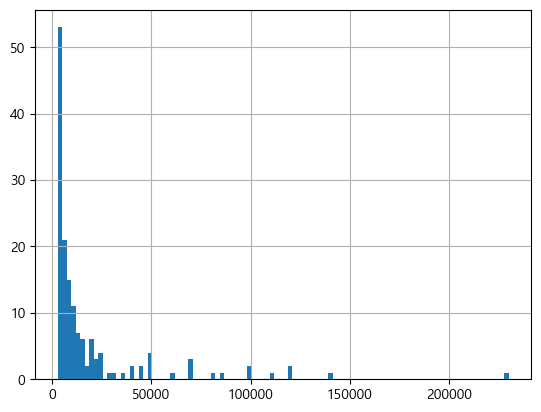

In [69]:
#연봉 그래프
picher['연봉(2018)'].hist(bins=100)

In [70]:
picher['연봉(2018)'].sort_values()

103      2700
93       2700
115      2700
82       2800
105      2800
        ...  
4      111000
20     120000
1      120000
0      140000
2      230000
Name: 연봉(2018), Length: 152, dtype: int64

In [73]:

picher_features_df=picher.iloc[:,2:]
picher_features_df

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [ ]:
#### picher DF
#### 선수명, 팀명 제외 DF


In [72]:
import seaborn as sns

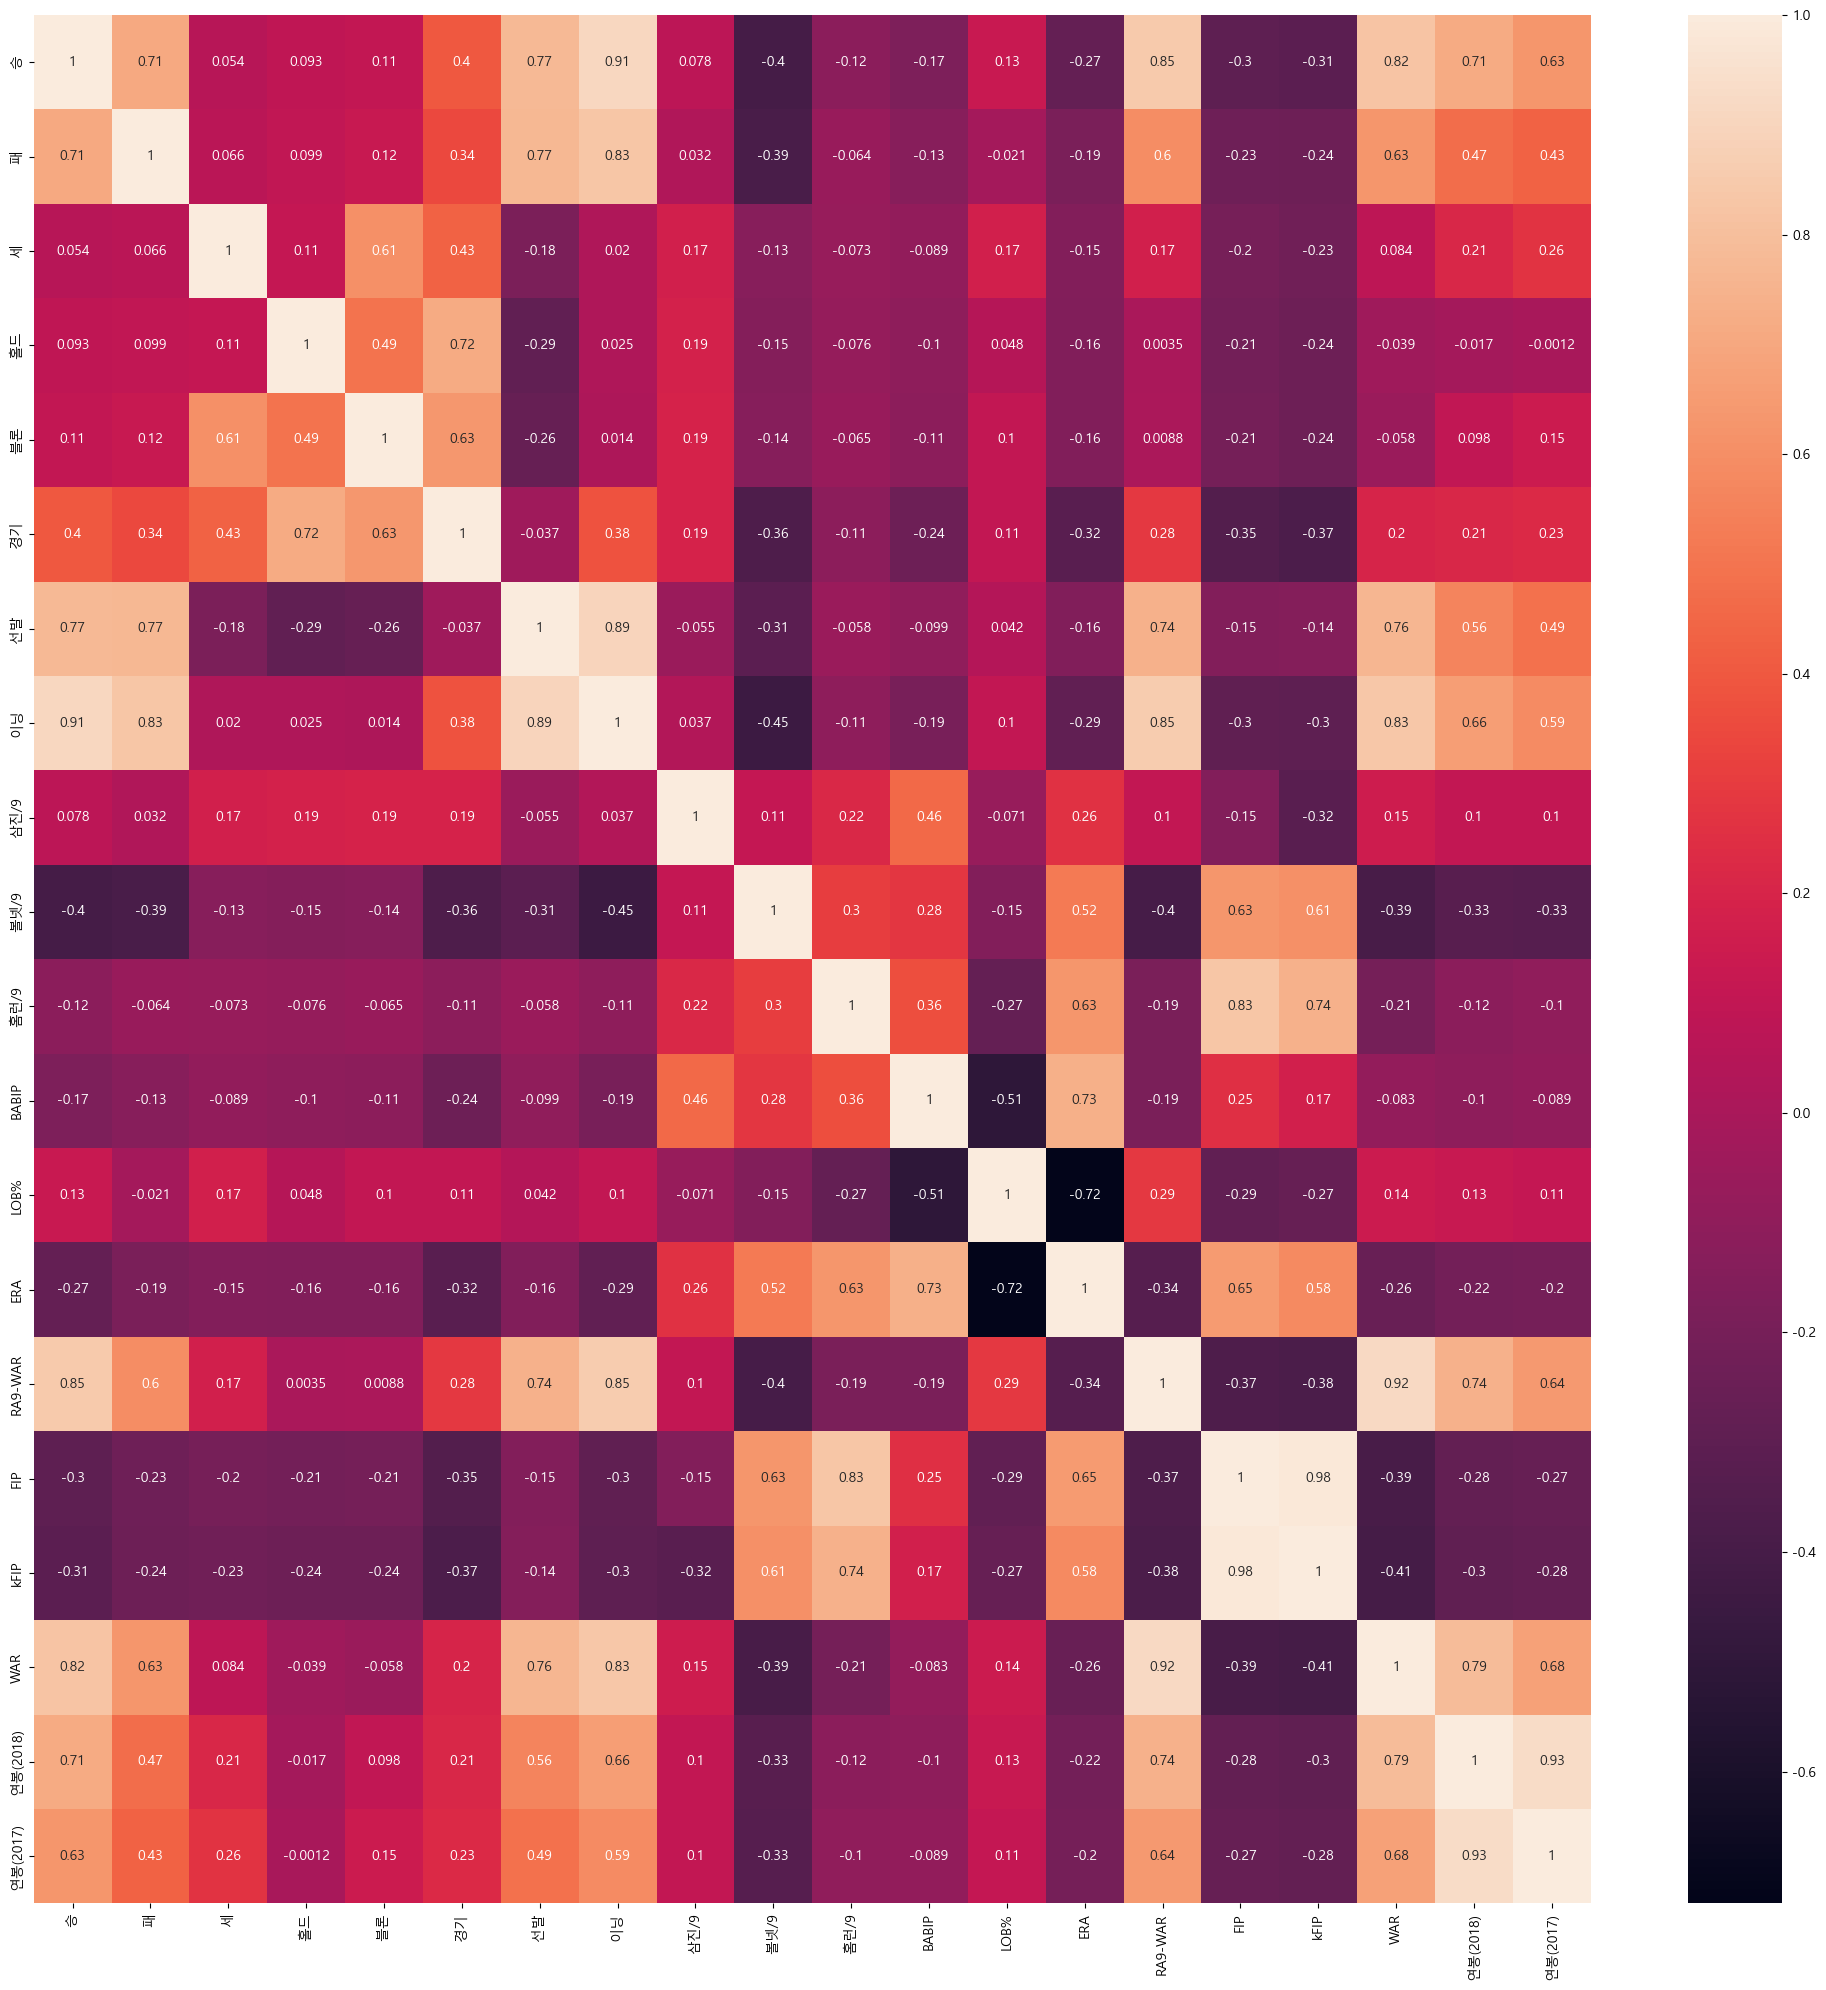

In [74]:
# method : pearson,kendall,spearman
corr = picher_features_df.corr(method='pearson')
show_cols = picher_features_df.columns
plt.figure(figsize=(20,20))
# sns.set(font_scale=1.5)
sns.heatmap(corr.values,
            annot = True,
            yticklabels=show_cols,
            xticklabels=show_cols
            )
plt.tight_layout()
plt.show()

In [ ]:
#subplot 여러개의 hist 출력 (5*5)
#fig, axs=plt.subplots

#subplots,subplot,add_subplot,subplot2grid


In [75]:
def plot_hist_each_column(df):
    #plt.figure(figsize=(20,20))
    plt.rcParams['figure.figsize'] = [20,20]
    fig=plt.figure(1)
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]],bins=50) #bins 그래프 폭
        ax.set_title(df.columns[i])  #컬럼명을 타이틀로 사용

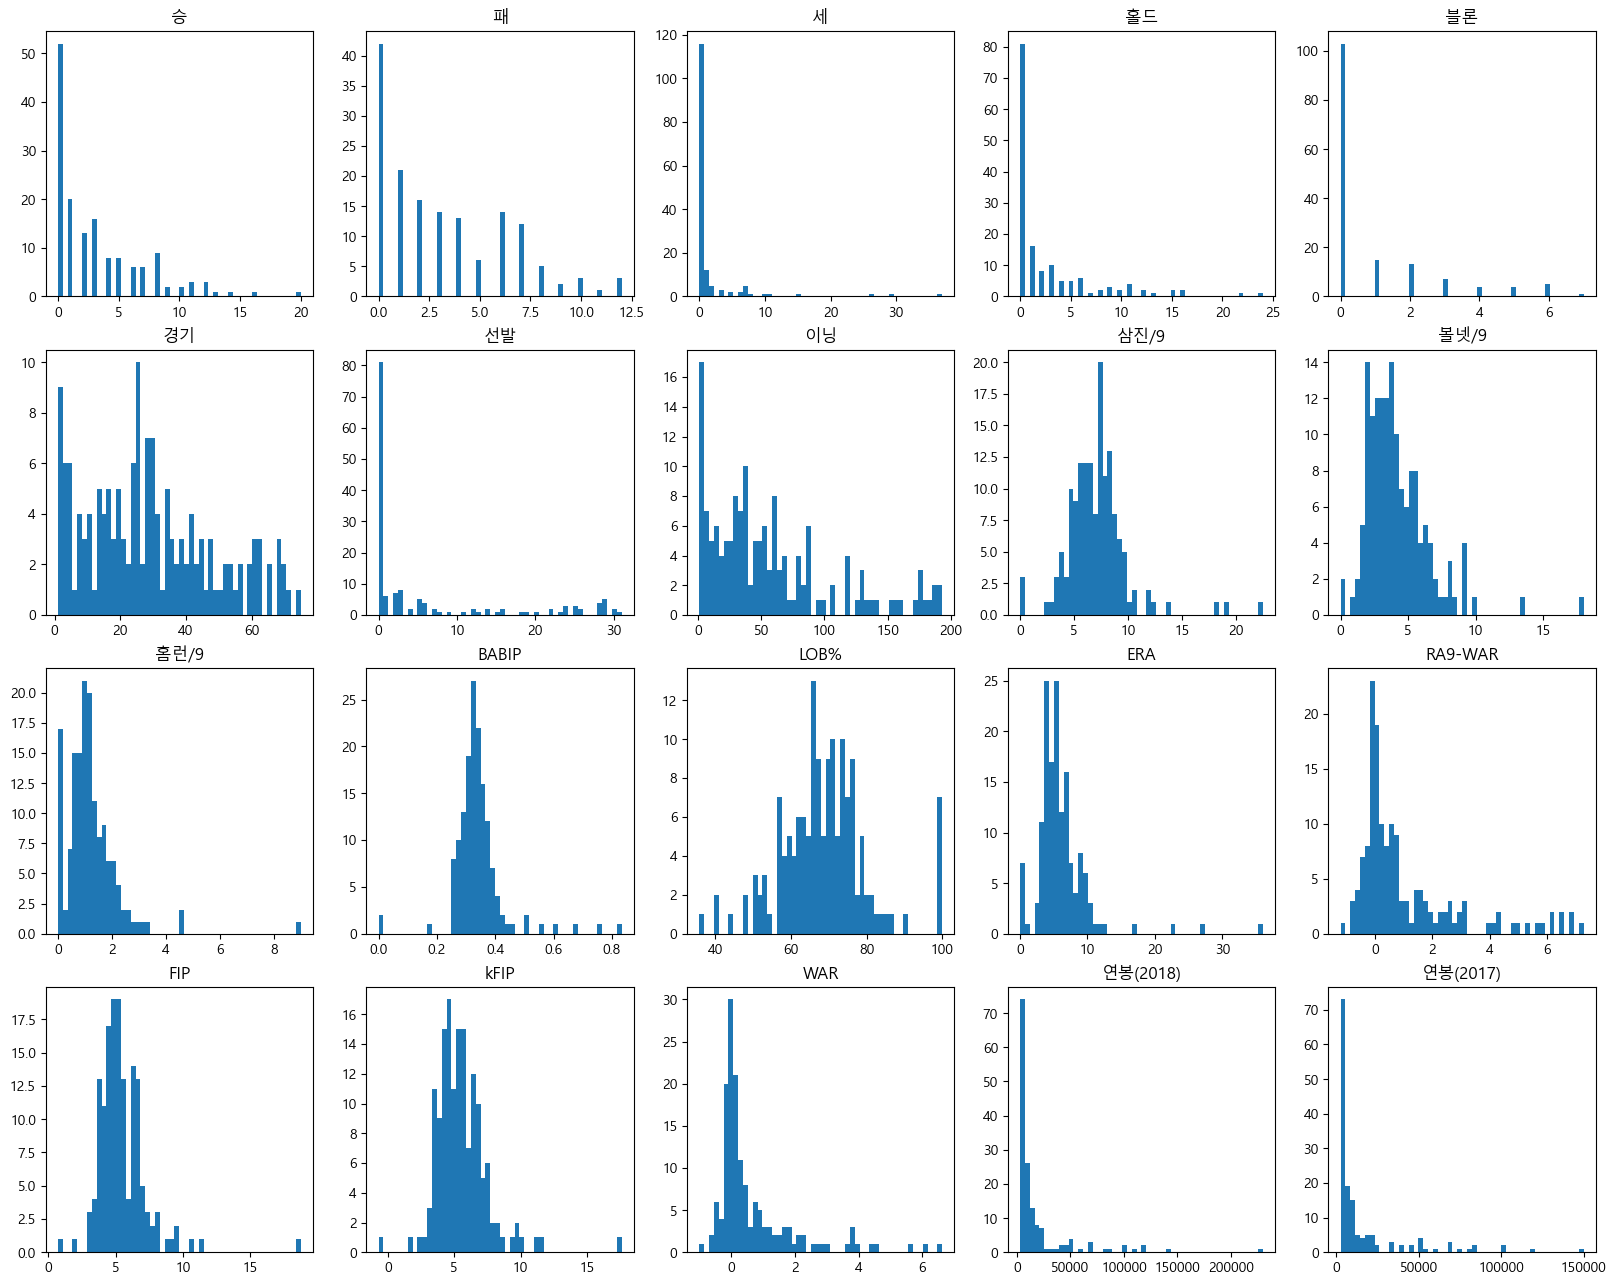

In [76]:
plot_hist_each_column(picher_features_df)

In [85]:
#데이터확인
picher_result=picher['연봉(2018)']
picher_result

picher_y_df = picher_features_df.drop('연봉(2018)',axis=1)
picher_y_df
# picher_y_df :연봉(2018),선수명,팀명

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


In [82]:
# from sklearn.model_selection import train_test_split
# train_input,test_input,train_target,test_target=train_test_split(
#     picher_y_df,picher_result,random_state=42
# )

In [ ]:
#팀명 빠져있음.

In [130]:
#표준화 작업
# picher_y_scaled_df :선수명,팀명,연봉(2018) 제외****,
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(picher_y_df)
picher_y_scaled_df=ss.transform(picher_y_df)

In [134]:
df_numpy = pd.DataFrame(picher_y_scaled_df)
df_numpy.columns = picher_y_df.columns
df_numpy.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746


In [131]:
type(picher_y_scaled_df)

numpy.ndarray

In [132]:
# 선수명, 팀명 합치기
# concat 두 DataFrame 합치기
picher_y_scaled_nt_df = pd.concat([picher.iloc[:,:2],df_numpy],axis=1)
picher_y_scaled_nt_df

# picher : 모든 컬럼 존재
# picher_features_df : 선수명,팀명 제외
# picher_y_df : 연봉(2018),선수명,팀명 제외
# picher_result : 연봉(2018)
# picher_y_scaled_df : 선수명,팀명,연봉(2018) 제외, 표준화작업 완료상태
# picher_y_scaled_nt_df : 선수명,팀명포함 표준화작업 됨

,선수명,팀명,0,1,2,3,4,5,6,7,...,18,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,SK,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,...,2.743746,False,False,False,False,True,False,False,False,False
1,소사,LG,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,...,1.341724,False,False,True,False,False,False,False,False,False
2,양현종,KIA,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,...,5.347500,True,False,False,False,False,False,False,False,False
3,차우찬,LG,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,...,3.344612,False,False,True,False,False,False,False,False,False
4,레일리,롯데,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,...,2.743746,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.112380,0.104645,...,-0.336696,False,False,False,False,False,False,False,False,True
148,정용운,KIA,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,...,-0.536985,True,False,False,False,False,False,False,False,False
149,노경은,롯데,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.421087,-0.852829,...,-0.020240,False,False,False,False,False,False,True,False,False
150,김승현,삼성,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,-0.626891,-0.274355,...,-0.544996,False,False,False,False,False,False,False,True,False


In [135]:
picher_y_scaled_df = pd.DataFrame(picher_y_scaled_df)
picher_y_scaled_df.columns = picher_y_df.columns
picher_y_scaled_df

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.112380,0.104645,-0.972099,-0.375064,0.365057,0.163412,-1.006027,0.412709,-1.233602,0.377052,0.477566,-0.861951,-0.336696
148,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,-0.780490,0.605813,-0.147905,-0.873882,-0.270312,-0.030353,-0.362917,0.484298,0.624396,-0.877127,-0.536985
149,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.421087,-0.852829,-0.759200,0.308578,1.223282,0.467836,-1.360901,1.351808,-1.026814,1.352985,1.393990,-0.968185,-0.020240
150,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,-0.626891,-0.274355,0.205943,1.200284,0.226952,0.005563,0.465402,-0.066472,-0.792818,0.730962,0.715532,-1.036478,-0.544996


In [136]:
### 원핫인코딩후 팀명을 추가
# picher['팀명']
team_encoding = pd.get_dummies(picher['팀명'])
team_encoding
# picher_y_scaled_df : 선수명,팀명,연봉(2018) 제외, 표준화작업 완료상태
picher_y_scaled_df = picher_y_scaled_df.join(team_encoding)
picher_y_scaled_df

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,...,2.743746,False,False,False,False,True,False,False,False,False
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,...,1.341724,False,False,True,False,False,False,False,False,False
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,...,5.347500,True,False,False,False,False,False,False,False,False
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,...,3.344612,False,False,True,False,False,False,False,False,False
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,...,2.743746,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.112380,0.104645,-0.972099,-0.375064,...,-0.336696,False,False,False,False,False,False,False,False,True
148,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,-0.780490,0.605813,...,-0.536985,True,False,False,False,False,False,False,False,False
149,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.421087,-0.852829,-0.759200,0.308578,...,-0.020240,False,False,False,False,False,False,True,False,False
150,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,-0.626891,-0.274355,0.205943,1.200284,...,-0.544996,False,False,False,False,False,False,False,True,False


In [125]:
type(picher_y_scaled_df)

pandas.core.frame.DataFrame

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(
    picher_y_scaled_df,picher_result, random_state=42
)

In [139]:
train_input

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
55,-0.051252,-0.371047,-0.098828,0.967708,-0.545389,1.354452,-0.626891,-0.178608,0.890768,0.134482,...,0.660742,False,False,False,False,False,False,False,False,True
27,0.468106,-0.691497,0.318446,0.745515,0.068679,1.613416,-0.318184,0.623277,0.596258,-0.481220,...,-0.020240,False,False,False,True,False,False,False,False,False
148,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,-0.780490,0.605813,...,-0.536985,True,False,False,False,False,False,False,False,False
125,-0.570611,-0.050597,-0.307465,1.856479,0.068679,0.422180,-0.626891,-0.515718,-0.769845,-0.676546,...,1.141435,False,False,False,False,False,False,False,False,True
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,...,2.743746,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.208427,0.269852,-0.307465,1.634286,3.139016,1.250866,-0.626891,-0.116771,1.043346,0.533627,...,-0.400788,False,False,False,False,False,False,True,False,False
106,-0.310932,-0.691497,-0.307465,-0.587641,-0.545389,0.370387,-0.112380,-0.054934,0.479163,-0.099060,...,-0.340702,False,False,False,True,False,False,False,False,False
14,1.247144,0.269852,-0.307465,0.078937,-0.545389,0.318594,0.813740,0.862645,0.479163,-0.409034,...,-0.260586,False,False,False,False,False,False,False,True,False
92,-0.830290,-1.011947,-0.307465,-0.587641,-0.545389,-0.976228,-0.626891,-0.932619,-1.302093,-0.341095,...,-0.532979,False,False,False,False,False,False,False,True,False


In [142]:
#데이터 학습시키기
lr= LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [143]:
print(lr.coef_)


[  4275.70472857   -733.92522229   -443.71316901  -1127.16218213
    999.02769204  -4688.22078678 -12287.99794284  10287.9892736
   3066.41059196   5588.04678352  12438.88289024  -2016.26394952
    643.39847158   1936.15651647  -1099.53028955 -67976.86463099
  57700.61368947  12156.18593342  21312.23273105   7353.91637876
   2303.85227188  -1512.97388733  -1341.43843238   -103.79901464
  -4227.6868152    -618.43449436  -4148.53556228   2295.09955555]


In [145]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9344519586230713
0.733012158768199


In [ ]:
#비슷한 컬럼 제거
#상관관계 높은 것은 제거해서 다시 훈련모델을 실행 
#더 좋은 성능의 모델을 구현 

In [ ]:
##degree 형태를 늘려서 테스트 
##규제 잘 안됨.

In [147]:
## train 평가서 모듈 statsmodels
import statsmodels.api as sm

train_input = sm.add_constant(train_input)
model = sm.OLS(train_target.astype(int),train_input.astype(int)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     37.02
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.50e-36
Time:                        16:55:38   Log-Likelihood:                -1206.4
No. Observations:                 114   AIC:                             2469.
Df Residuals:                      86   BIC:                             2545.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5289.1414   1463.023      3.615      0.001    2380.748    8197.535
승           1.077e+04   3503.233      3.076      0.003    3810.162    1.77e+04
패           -924.7645   2364.078     -0.391      0.697   -5624.396    3774.867
세           1252.7695   2082.832      0.601      0.549   -2887.764    5393.303
홀드          5953.5895   3121.761      1.907      0.060    -252.267    1.22e+04
블론          3429.3330   2085.444      1.644      0.104    -716.392    7575.058
경기         -1060.5086   2541.532     -0.417      0.678   -6112.906    3991.889
선발          6007.9599   5587.184      1.075      0.285   -5098.995    1.71e+04
이닝          1187.1718   4533.587      0.262      0.794   -7825.301    1.02e+04
삼진/9       -1457.5031   2891.143     -0.504      0.615   -7204.905    4289.898
볼넷/9        1020.3844   2704.607      0.377      0.707   -4356.197    6396.966
홈런/9        4331.3984   3448.096      1.256      0.212   -2523.189    1.12e+04
BABIP      -1164.2421   2807.458     -0.415      0.679   -6745.283    4416.799
LOB%        -269.1870   2343.994     -0.115      0.909   -4928.892    4390.518
ERA          604.6003   3319.071      0.182      0.856   -5993.495    7202.695
RA9-WAR    -5190.2061   4088.779     -1.269      0.208   -1.33e+04    2938.017
FIP        -7678.9940   4884.750     -1.572      0.120   -1.74e+04    2031.567
kFIP        1407.3149   4834.684      0.291      0.772   -8203.720     1.1e+04
WAR         1.297e+04   3268.504      3.968      0.000    6473.042    1.95e+04
연봉(2017)    2.293e+04   1940.057     11.822      0.000    1.91e+04    2.68e+04
KIA         3311.5601   3535.534      0.937      0.352   -3716.848    1.03e+04
KT          1174.5570   2895.655      0.406      0.686   -4581.814    6930.928
LG          -949.7329   3253.109     -0.292      0.771   -7416.699    5517.233
NC          2613.7900   3519.223      0.743      0.460   -4382.194    9609.774
SK         -2237.9774   3278.584     -0.683      0.497   -8755.587    4279.632
두산         -3588.9324   3581.206     -1.002      0.319   -1.07e+04    3530.269
롯데         -2133.0497   3457.837     -0.617      0.539   -9007.003    4740.903
삼성          -843.8578   2866.489     -0.294      0.769   -6542.249    4854.533
한화          7942.7846   3000.586      2.647      0.010    1977.818    1.39e+04
==============================================================================
Omnibus:                       17.021   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.802
Skew:                           0.276   Prob(JB):                     2.31e-14
Kurtosis:                       6.594   Cond. No.                     1.74e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

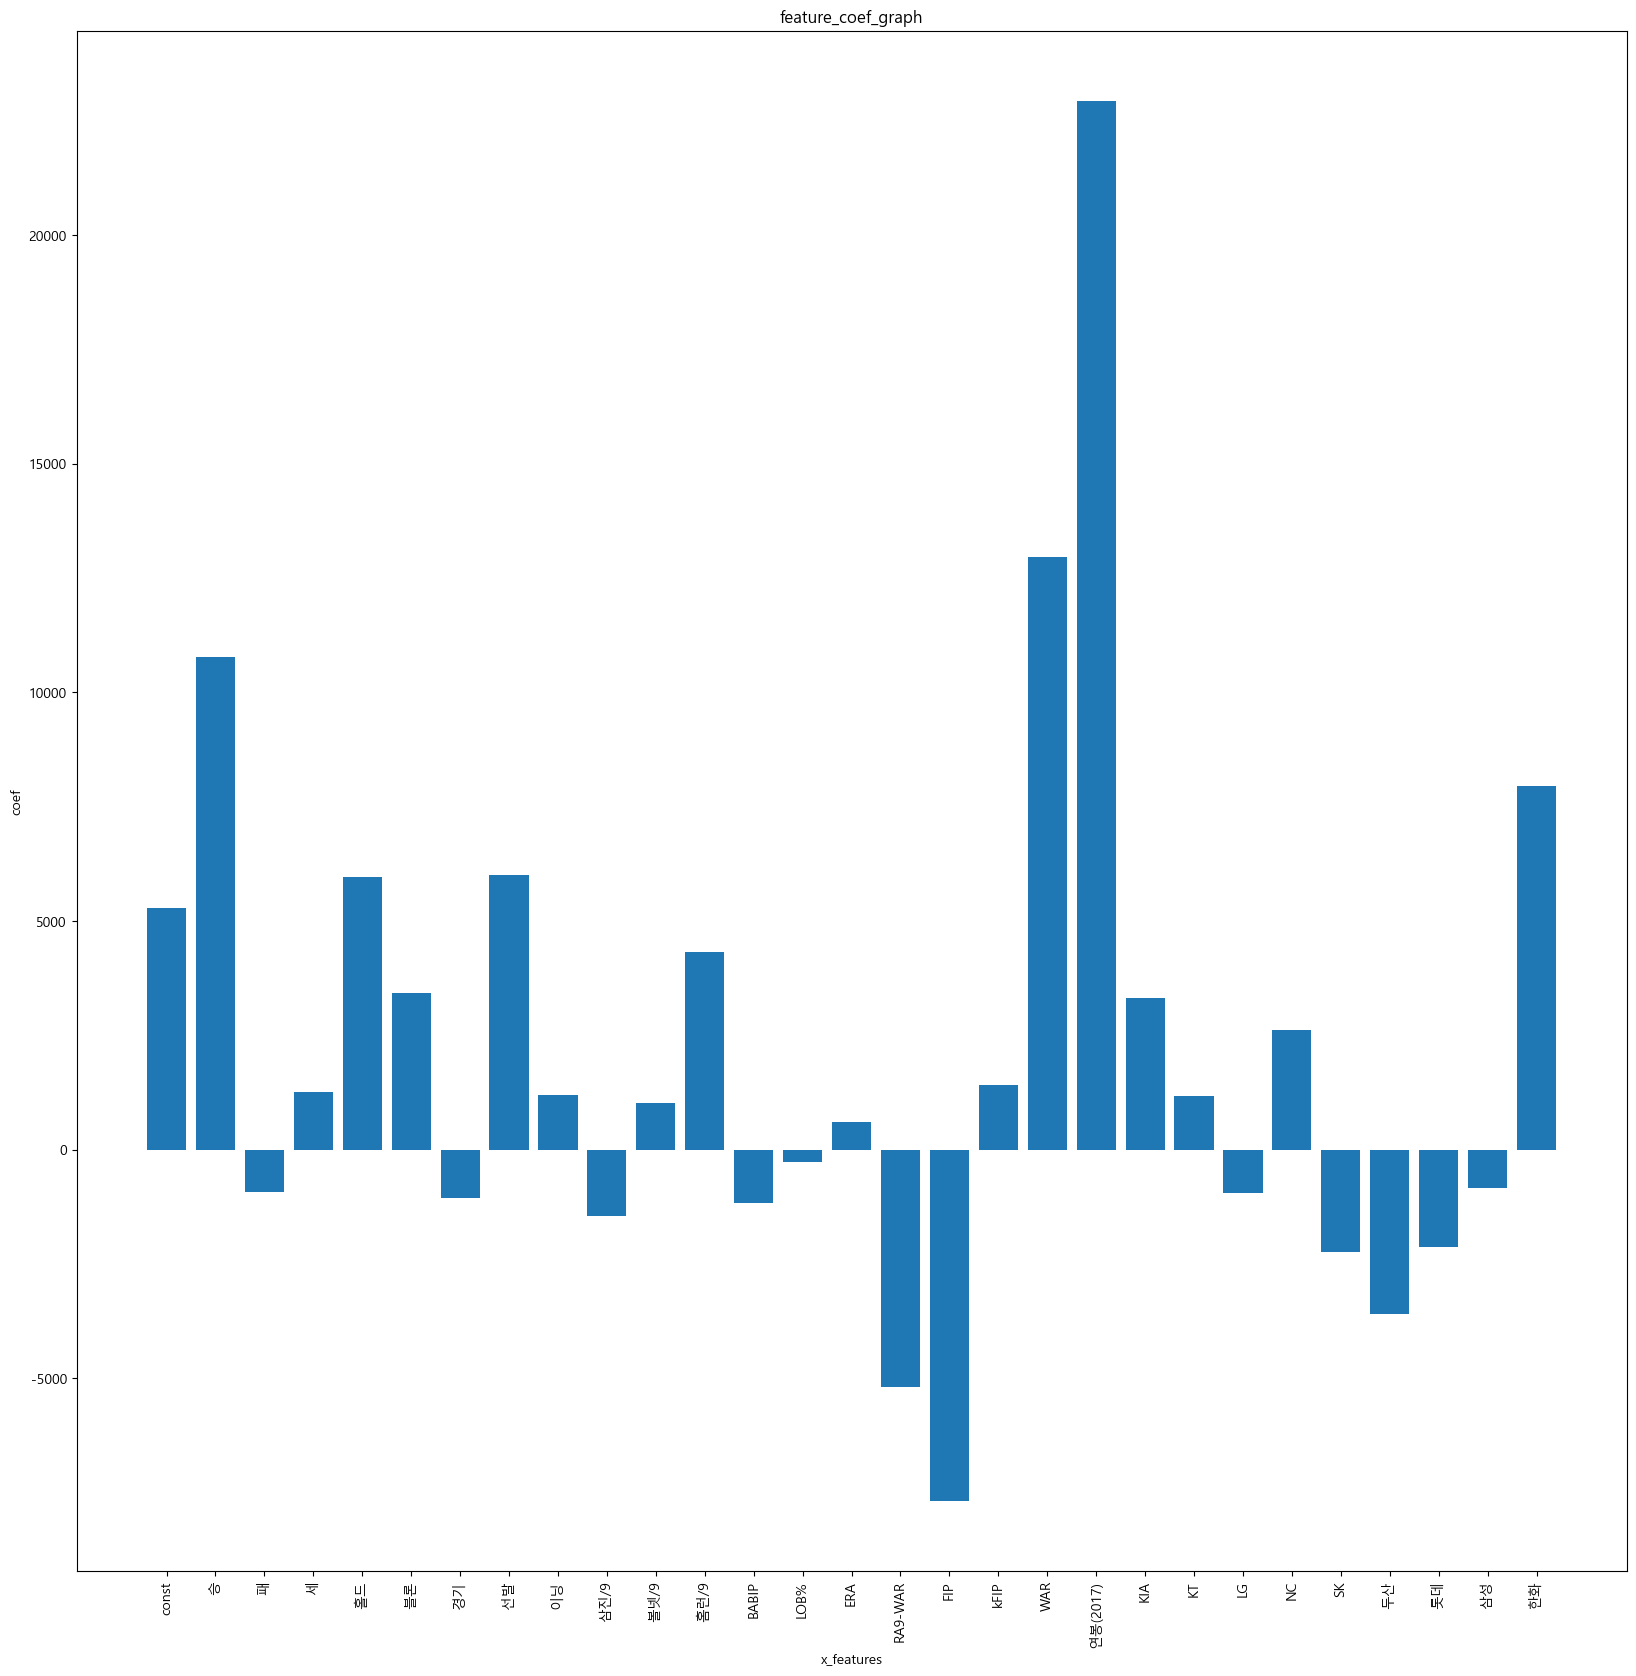

In [157]:
###평가서를 그래프 출력
plt.figure(figsize=(20,20))
#회귀 계수- 기울기
coefs=model.params.tolist()
coefs_series=pd.Series(coefs)
coefs_series

#변수명 - 특성이름
x_labels=model.params.index.tolist()

#그래프 출력
plt.bar(x_labels,coefs_series)
plt.xticks(rotation=90)
plt.title('feature_coef_graph')
plt.xlabel('x_features')
plt.ylabel('coef')
plt.show()

In [180]:
#회귀분석 예측 - 고려사항 체크 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [181]:
#각 feature 마다 VIF 계수 출력
# target 어느정도 영향을 가했는지 확인
#값이 높은 것은 결과 예측에 많은 영향을 미쳤다 라고 판단 
vif = pd.DataFrame()   #선언
vif['VIF Factor'] = [variance_inflation_factor(picher_y_scaled_df.values.astype(float),i) for i in range(picher_y_scaled_df.shape[1])]
vif['features'] = picher_y_scaled_df.columns
vif.round(1)

,VIF Factor,features
0,8.0,승
1,5.9,패
2,3.1,세
3,3.8,홀드
4,3.0,블론
5,14.6,경기
6,39.6,선발
7,63.8,이닝
8,89.5,삼진/9
9,57.8,볼넷/9


In [183]:
###  ['FIP','WAR',"볼넷/9",'삼진/9','연봉(2017)']
#### 선형회귀 모델 다 시 실행 해보시오.
# print(picher_y_scaled_df.columns)
new_df = picher_y_scaled_df[['FIP','WAR',"볼넷/9",'삼진/9','연봉(2017)']]
new_df
picher_result.head()

0    140000
1    120000
2    230000
3    100000
4    111000
Name: 연봉(2018), dtype: int64

In [185]:
train_scaled,test_scaled,train_target,test_target=train_test_split(
    new_df,picher_result,random_state=42
)
train_scaled.head(2)

,FIP,WAR,볼넷/9,삼진/9,연봉(2017)
55,-0.314681,-0.216960,0.134482,0.890768,0.660742
27,-0.588156,0.541852,-0.481220,0.596258,-0.020240


In [186]:
#데이터 실습시키기
lr=LinearRegression()
lr.fit(train_scaled,train_target)

LinearRegression()

In [187]:
print(lr.score(train_scaled,train_target))

0.9184173535558415


In [188]:
print(lr.score(test_scaled,test_target))

0.8643487494511758


In [178]:
print(picher_result)

0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64


In [189]:
# ##VIF factor 14번 RA9-WAR,16번 kFIP 삭제
# #너무 높은 feature값 삭제하는게 나음.
# picher_yy_scaled_df=picher_y_scaled_df.drop[['RA9-WAR','kFIP']],axis=1
# picher_yy_scaled_df

# train_scaled,test_scaled,train_target,test_target=train_test_split(
#     new_df,picher_result,random_state=42
# )

TypeError: cannot unpack non-iterable int object

In [190]:
pre_df=picher[['FIP','WAR',"볼넷/9",'삼진/9','연봉(2017)']]
pre_df.head()

,FIP,WAR,볼넷/9,삼진/9,연봉(2017)
0,3.69,6.62,2.13,8.95,85000
1,3.52,6.08,1.85,7.43,50000
2,3.94,5.64,2.09,7.36,150000
3,4.20,4.63,1.95,8.04,100000
4,4.36,4.38,2.11,7.49,85000


In [192]:
#데이터 예측하기
pre_2018=lr.predict(pre_df)


In [193]:
picher['예측연봉(2018)']=pd.Series(pre_2018)


In [194]:
#wpicher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)', '예측연봉(2018)'],
      dtype='object')

In [195]:
#작년연봉,예측연봉,실제연봉 출력
picher[['선수명', '팀명','연봉(2017)', '예측연봉(2018)','연봉(2018)']]

,선수명,팀명,연봉(2017),예측연봉(2018),연봉(2018)
0,켈리,SK,85000,1.895692e+09,140000
1,소사,LG,50000,1.115145e+09,120000
2,양현종,KIA,150000,3.345263e+09,230000
3,차우찬,LG,100000,2.230190e+09,100000
4,레일리,롯데,85000,1.895670e+09,111000
...,...,...,...,...,...
147,장민재,한화,8100,1.806576e+08,7100
148,정용운,KIA,3100,6.915332e+07,7500
149,노경은,롯데,16000,3.568386e+08,10000
150,김승현,삼성,2900,6.468860e+07,4000
